In [1]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import center_and_r_vir, remove_bulk_velocity
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
path = "bulk1/data_2/hydro_59/output/"
data = pynbody.load(path + "output_00050")
aexp = data.properties['a']
data.physical_units()
r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir
sph_5 = pynbody.filt.Sphere(radius = '%f kpc' %(r_e*1.4))
region = data[sph_5]
rho = region.gas["rho"].in_units("m_p cm**-3")
f = open(data.filename + "/info_"+data.filename[-5:]+".txt","r")
lines = f.readlines()
f.close()
for line in lines:
    if line[0:13]=="unit_l      =":
        print line[:-1]
        unit_l = float(line[14:-1])
    if line[0:13]=="unit_d      =":
        print line[:-1]
        unit_d = float(line[14:-1])
    if line[0:13]=="unit_t      =":
        print line[:-1]
        unit_t = float(line[14:-1])
    if line[0:13]=="omega_b     =":
        print line[:-1]
        omega_b = float(line[14:-1])

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))
omega_b     =  0.450000017881393E-01
unit_l      =  0.682025380323961E+26
unit_d      =  0.123367583719985E-28
unit_t      =  0.163687521954501E+18


In [3]:
m_p = pynbody.array.SimArray(1.672621777e-24, "g")
K_b = pynbody.array.SimArray(1.38064852e-16, "cm**2 g s**-2 K**-1")
G = pynbody.array.SimArray(6.67259e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.38064852e-16, "erg K**-1")
c_si = pynbody.array.SimArray(2.99792458e5, "km s**-1")
c_cgs = pynbody.array.SimArray(2.99792458e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.13566770e-15, "eV s")
h_erg = pynbody.array.SimArray(6.626196e-27, "erg s")
mH_cgs = pynbody.array.SimArray(1.6737236e-24, 'g')  # hydrogen mass
T_bg = pynbody.array.SimArray(2.73, "K")
eV = pynbody.array.SimArray(6.241509e18, "J")
L_sun = pynbody.array.SimArray(2.43418864387146974e+45, "eV s**-1")
cell_width = pynbody.array.SimArray(region.gas["smooth"]*3.086e+21, "cm")
M_sun = pynbody.array.SimArray(2e33, "g")
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
cell_width_arr = pynbody.array.SimArray(region.gas["smooth"]*3.086e+21, "cm")

In [23]:
X_H2_bar = np.load('outputs/pdf_RT_1.0/X_H2_bar.npy')
X_CO_bar = np.load('outputs/pdf_RT_1.0/X_CO_bar.npy')
mach_no_arr = np.load('outputs/pdf_RT_1.0/mach_no_arr.npy')
n_H_mean_arr = np.load('outputs/pdf_RT_1.0/n_H_mean_arr.npy')
metal_arr = np.load('outputs/pdf_RT_1.0/metal_arr.npy')
temperature = np.load('outputs/pdf_RT_1.0/T.npy')
l_CO_bar = np.load('outputs/pdf_RT_1.0/l_CO_bar.npy')
l_CO_SI_bar = np.load('outputs/pdf_RT_1.0/l_CO_SI_bar.npy')

In [8]:
L_CO = np.sum(l_CO_bar)
L_CO

7.413759610945978e-26

In [9]:
L_CO_SI = np.sum(l_CO_SI_bar)
L_CO_SI

4.960484743572137e-54

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


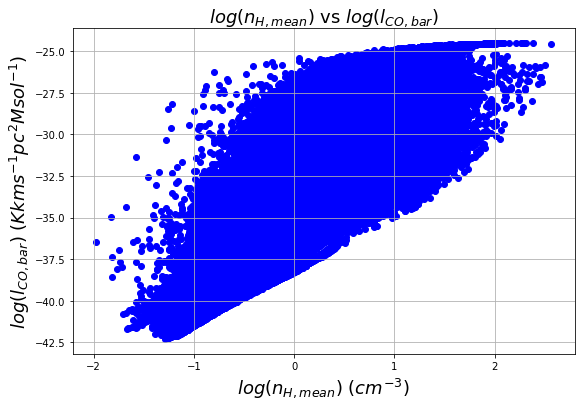

In [25]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar*M_sun/n_H_mean_arr), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, bar}) \ (K km s^{-1} pc^{2} Msol^{-1})$')
# ax.set_ylim([-0.1,0.5])
# ax.set_xlim([-4, 7])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, bar})$")
# plt.savefig('outputs/test_plots/log(n_H_mean)vsl_CO_bar-M.png', 
#             dpi=300, bbox_inches='tight')
plt.show()